<a href="https://colab.research.google.com/github/HarshKapr/Cloud/blob/main/Assesment2_SIG742_Harsh_Pavan_Team19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary libraries
!pip install pyspark pandas matplotlib seaborn
# Import required libraries
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Initialize Spark session
spark = SparkSession.builder.appName("TransactionAnalysis").getOrCreate()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=9a2dbfa959d346458f0792c84397f5b675d0d5a094b479bb55e1c6e69d80acb9
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [2]:
from google.colab import files

uploaded = files.upload()

Saving transactionrecord to transactionrecord


**Task 1: Data Wrangling and Initial Processing**

**1.1.1 Handling 'NA' values in `CustomerNo`**

In [26]:
# Read the CSV data
data_path = "/content/transactionrecord"
df = spark.read.csv(data_path, header=True, inferSchema=True)
# Replace 'NA' in CustomerNo with '-1'
df = df.withColumn("CustomerNo", when(df["CustomerNo"] == "NA", "-1").otherwise(df["CustomerNo"]))
# Show the updated DataFrame
df.show(5)

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|
|       581475|12/9/2019|    23272|Tree T-Light Hold...|             0ca|10.65|      12|     13069|United Kingdom|
|       581475|12/9/2019|    23239|Set Of 4 Knick Kn...|             0ca|11.94|       6|     13069|United Kingdom|
+-------------+---------+---------+--------------------+----------------+-----+-

In [27]:
from pyspark.sql.functions import when

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
# Show the count of the DataFrame
row_count = df.count()

print(f"Total number of rows in the DataFrame: {row_count}")

Total number of rows in the DataFrame: 536350


In [30]:
df.filter(col("CustomerNo") == -1)
df.show()

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|
|       581475|12/9/2019|    23272|Tree T-Light Hold...|             0ca|10.65|      12|     13069|United Kingdom|
|       581475|12/9/2019|    23239|Set Of 4 Knick Kn...|             0ca|11.94|       6|     13069|United Kingdom|
|       581475|12/9/2019|    21705|Bag 500g Swirly M...|             0ca|10.65| 

1.1.2 Process the text in productName column, only alphabet characters left, and save the processed result to a new column productName_process and show the first 5 rows.

In [31]:
# Remove non-alphabet characters from productName
df = df.withColumn("productName_process", regexp_replace(col("productName"), "[^A-Za-z]", ""))
# Show the first 5 rows with the new column
df.select("productName", "productName_process").show(5)

+--------------------+--------------------+
|         productName| productName_process|
+--------------------+--------------------+
|Set Of 2 Wooden M...|SetOfWoodenMarket...|
|Christmas Star Wi...|ChristmasStarWish...|
|Storage Tin Vinta...|StorageTinVintage...|
|Tree T-Light Hold...|TreeTLightHolderW...|
|Set Of 4 Knick Kn...|SetOfKnickKnackTi...|
+--------------------+--------------------+
only showing top 5 rows



1.2.1 Find out the revenue on each transaction date. In order to achieve the above, some wrangling work is required to be done: 1.2.1 Using pyspark to calculate the revenue (price * Quantity) and save as float format in pyspark dataframe to show the top 5 rows.

In [32]:
# Calculate revenue (price * Quantity)
df = df.withColumn("Revenue", (df["price"] * df["Quantity"]).cast("float"))
# Show the top 5 rows
df.select("Date", "CustomerNo", "Revenue").show(5)

+---------+----------+-------+
|     Date|CustomerNo|Revenue|
+---------+----------+-------+
|12/9/2019|     17490| 257.64|
|12/9/2019|     13069|  383.4|
|12/9/2019|     13069| 138.36|
|12/9/2019|     13069|  127.8|
|12/9/2019|     13069|  71.64|
+---------+----------+-------+
only showing top 5 rows



1.2.2 Transform the pyspark dataframe to pandas dataframe (named as df) and create the column transaction_date with date format according to Date. Print your df pandas dataframe with top 5 rows after creating the column transaction_date.

In [63]:
# Convert to pandas dataframe
pandas_df = df.toPandas()
# Create transaction_date column
pandas_df['transaction_date'] = pd.to_datetime(pandas_df['Date'])
# Show the top 5 rows
pandas_df.head()

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,productName_process,Revenue,transaction_date
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,SetOfWoodenMarketCrates,257.640015,2019-12-09
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,ChristmasStarWishListChalkboard,383.399994,2019-12-09
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,StorageTinVintageLeaf,138.360001,2019-12-09
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,TreeTLightHolderWillieWinkie,127.800003,2019-12-09
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,SetOfKnickKnackTinsPoppies,71.639999,2019-12-09


1.2.3 Plot the sum of revenue on transaction_date in a line plot and find out any immediate pattern / insight?

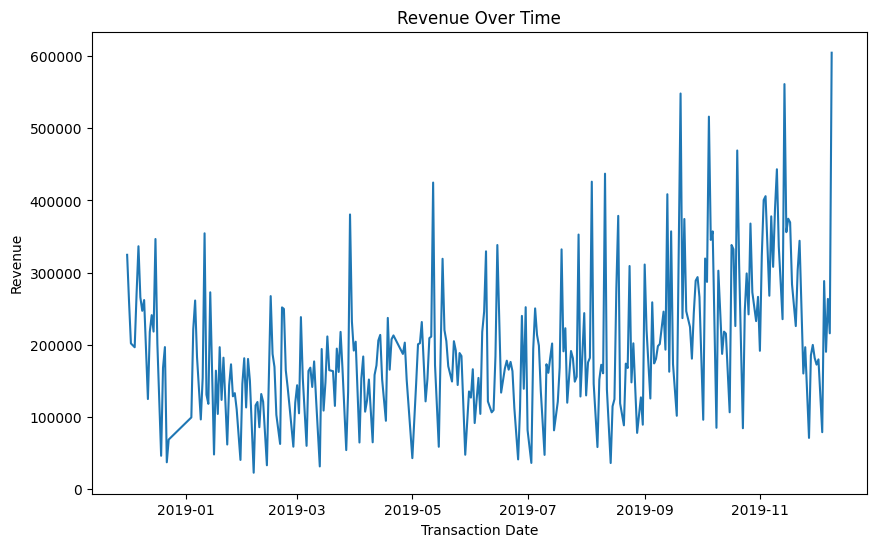

In [34]:
# Group by transaction_date and calculate total revenue
revenue_by_date = pandas_df.groupby("transaction_date")["Revenue"].sum().reset_index()
# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=revenue_by_date, x="transaction_date", y="Revenue")
plt.title("Revenue Over Time")
plt.xlabel("Transaction Date")
plt.ylabel("Revenue")
plt.show()

Let’s continue to analyse on the transaction_date vs revenue.

1.3.1 Determine which workday (day of the week), generates the most sales (plotting the results in a line chart with workday on averaged revenues)

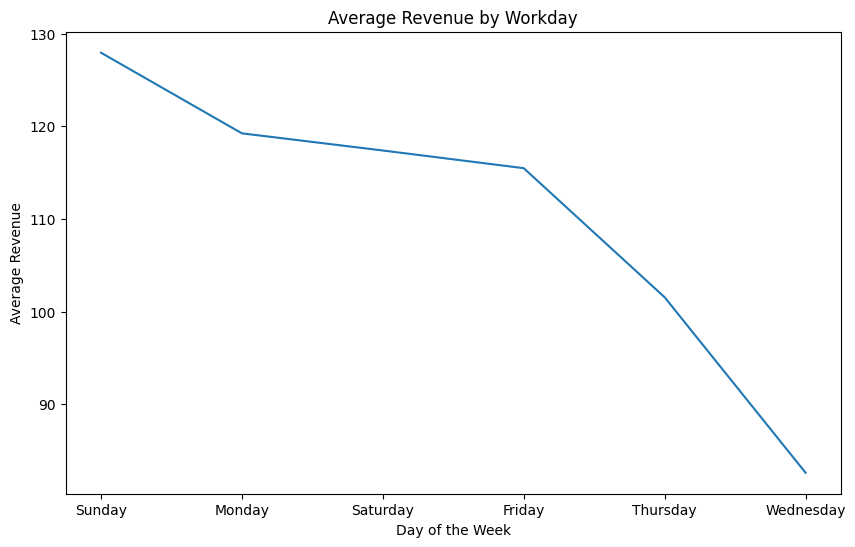

In [35]:
# Add a column for day of the week
pandas_df['workday'] = pandas_df['transaction_date'].dt.day_name()
# Calculate average revenue by workday
avg_revenue_by_workday = pandas_df.groupby("workday")["Revenue"].mean().sort_values(ascending=False)
# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_revenue_by_workday)
plt.title("Average Revenue by Workday")
plt.xlabel("Day of the Week")
plt.ylabel("Average Revenue")
plt.show()

1.3.2 Identify the name of product (column productName_process) that contributes the highest revenue on ‘that workday’ (you need to find out from 1.3.1) and the name of product (column productName_process) that has the highest sales volume (sum of the Quantity), no need to remove negative quantity transactions.) on ‘that workday’ (you need to find out from 1.3.1).

In [36]:
# Identify the top workday (the first day in sorted avg_revenue_by_workday)
top_workday = avg_revenue_by_workday.index[0]
# Filter data for the top workday
top_workday_data = pandas_df[pandas_df['workday'] == top_workday]
# Identify the product with the highest revenue on that day
top_revenue_product = top_workday_data.groupby("productName_process")["Revenue"].sum().idxmax()
# Identify the product with the highest sales volume on that day
top_sales_volume_product = top_workday_data.groupby("productName_process")["Quantity"].sum().idxmax()
print(f"Product with highest revenue on {top_workday}: {top_revenue_product}")
print(f"Product with highest sales volume on {top_workday}: {top_sales_volume_product}")

Product with highest revenue on Sunday: WorldWarGlidersAsstdDesigns
Product with highest sales volume on Sunday: WorldWarGlidersAsstdDesigns


1.3.3 Please provide two plots showing the top 5 products that contribute the highest revenues in general and top 5 products that have the highest sales volumes in general.

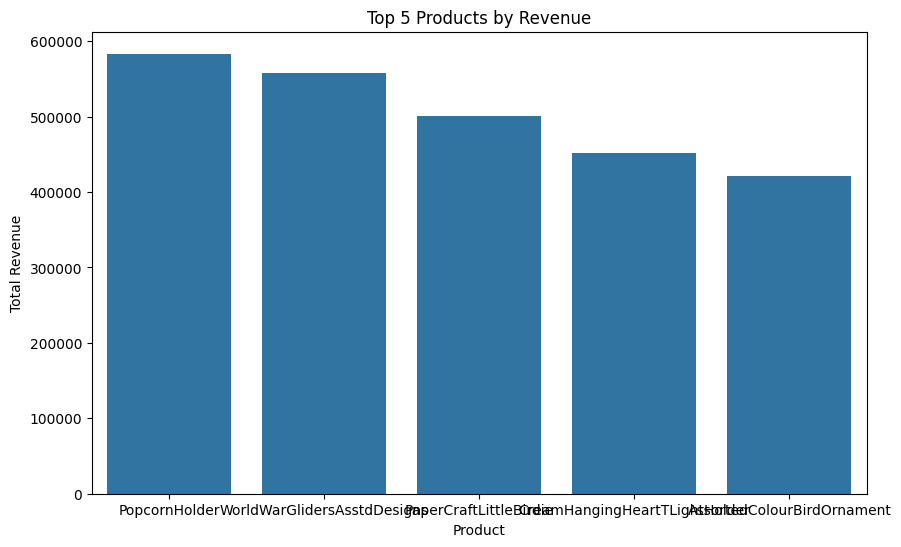

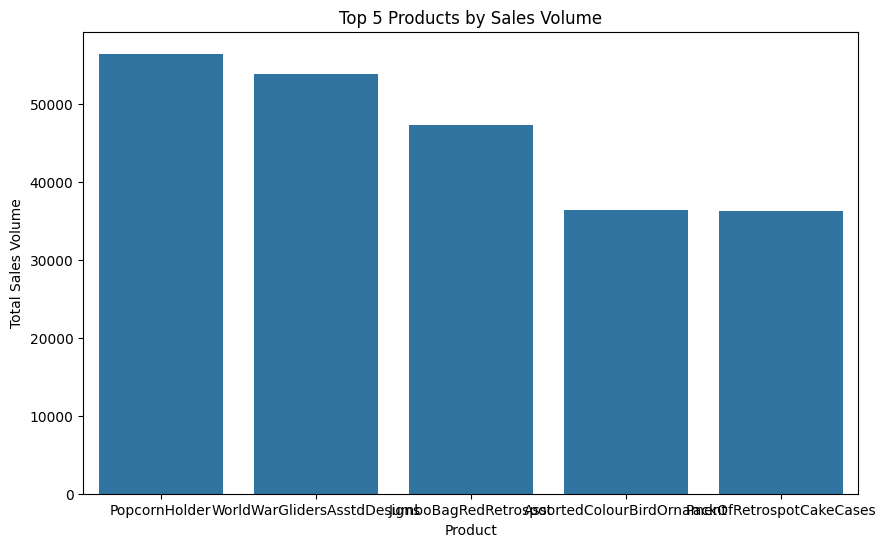

In [37]:
# Top 5 products by revenue
top5_revenue_products = pandas_df.groupby("productName_process")["Revenue"].sum().nlargest(5)
# Top 5 products by sales volume
top5_sales_volume_products = pandas_df.groupby("productName_process")["Quantity"].sum().nlargest(5)
# Plotting top 5 products by revenue
plt.figure(figsize=(10, 6))
sns.barplot(x=top5_revenue_products.index, y=top5_revenue_products.values)
plt.title("Top 5 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.show()
# Plotting top 5 products by sales volume
plt.figure(figsize=(10, 6))
sns.barplot(x=top5_sales_volume_products.index, y=top5_sales_volume_products.values)
plt.title("Top 5 Products by Sales Volume")
plt.xlabel("Product")
plt.ylabel("Total Sales Volume")
plt.show()

1.4 Which country generates the highest revenue? Additionally, identify the month in that country that has the highest revenue.

<ipython-input-38-c27d456fdf23>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_country_data["Month"] = top_country_data["transaction_date"].dt.month


Country with the highest revenue: United Kingdom
Month with the highest revenue in United Kingdom: 11.0


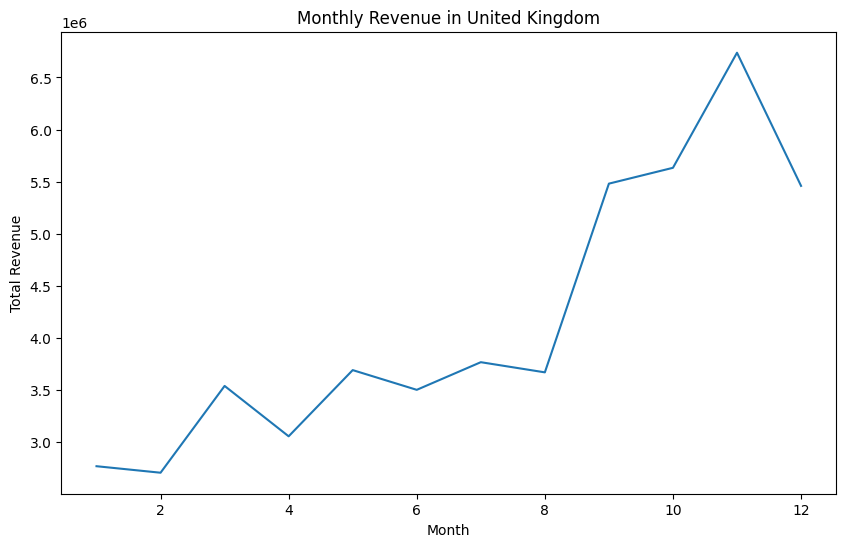

In [38]:
#Group by country and calculate total revenue
revenue_by_country = pandas_df.groupby("Country")["Revenue"].sum().reset_index()
# Find the country with the highest revenue
top_country = revenue_by_country.loc[revenue_by_country["Revenue"].idxmax()]["Country"]
# Filter data for the top country
top_country_data = pandas_df[pandas_df["Country"] == top_country]
# Add a month column to the data
top_country_data["Month"] = top_country_data["transaction_date"].dt.month
# Group by month and calculate total revenue
revenue_by_month = top_country_data.groupby("Month")["Revenue"].sum().reset_index()
# Find the month with the highest revenue
top_month = revenue_by_month.loc[revenue_by_month["Revenue"].idxmax()]["Month"]
print(f"Country with the highest revenue: {top_country}")
print(f"Month with the highest revenue in {top_country}: {top_month}")
# Plotting the revenue by month
plt.figure(figsize=(10, 6))
sns.lineplot(data=revenue_by_month, x="Month", y="Revenue")
plt.title(f"Monthly Revenue in {top_country}")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()

1.5 Let’s do some analysis on the CustomerNo and their transactions. Determine the shopping frequency of customers to identify who shops most frequently (find out the highest distinct count of transactionNo on customer level, be careful with those transactions that is not for shopping – filter those transaction quantity <= 0). Also, find out what products (column productName_process) ‘this customer’ typically buys based on the Quantity of products purchased.

In [39]:
# Filter out transactions with non-positive quantities
valid_transactions = pandas_df[pandas_df["Quantity"] > 0]
# Determine shopping frequency by counting distinct transactionNo per customer
shopping_frequency = valid_transactions.groupby("CustomerNo")["TransactionNo"].nunique()
# Identify the most frequent shopper
most_frequent_shopper = shopping_frequency.idxmax()
# Products typically bought by the most frequent shopper
products_by_shopper = valid_transactions[valid_transactions["CustomerNo"] == most_frequent_shopper]
top_products_by_shopper = products_by_shopper.groupby("productName_process")["Quantity"].sum().nlargest(5)
print(f"Most frequent shopper: CustomerNo {most_frequent_shopper}")
print("Top products bought by this shopper:")
print(top_products_by_shopper)

Most frequent shopper: CustomerNo 12748
Top products bought by this shopper:
productName_process
VictorianMetalPostcardSpring     595
WorldWarGlidersAsstdDesigns      480
RoseScentCandleJewelledDrawer    408
CartoonPencilSharpeners          405
SmallWhiteRetrospotMugInBox      390
Name: Quantity, dtype: int32


As the data scientist, you would like to build a basket-level analysis on the product customer buying (filter the ‘df’ dataframe with df[’Quantity’]>0). In this task, you need to:

1.6.1 Group by the transactionNo and aggregate the category of product (column product_category) into list on transactionNo level. Similarly, group and aggregate name of product (column productName_process) into list on transactionNo level.

In [40]:
# Group and aggregate product categories by transaction
df_1 = valid_transactions.groupby("TransactionNo").agg(
   product_categories=("Product_category", lambda x: list(x)),
   products=("productName_process", lambda x: list(x))
).reset_index()
# Show top 10 rows
df_1.head(10)

,TransactionNo,product_categories,products
0,536365,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca]","[CreamHangingHeartTLightHolder, WhiteMoroccanM..."
1,536366,"[0ca, 0ca]","[HandWarmerUnionJack, HandWarmerRedRetrospot]"
2,536367,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[AssortedColourBirdOrnament, PoppysPlayhouseBe..."
3,536368,"[0ca, 0ca, 0ca, 0ca]","[JamMakingSetWithJars, RedCoatRackParisFashion..."
4,536369,[0ca],[BathBuildingBlockWord]
5,536370,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[AlarmClockBakelikePink, AlarmClockBakelikeRed..."
6,536371,[0ca],[PaperChainKitSChristmas]
7,536372,"[0ca, 0ca]","[HandWarmerRedRetrospot, HandWarmerUnionJack]"
8,536373,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[CreamHangingHeartTLightHolder, WhiteMoroccanM..."
9,536374,[0ca],[VictorianSewingBoxLarge]


1.6.2 Removing duplicates on adjacent elements in the list from product_category you obtained from 1.6.1, such as [product category 1, product category 1, product category 2, ...] will be processed as [product category 1, product category 2,....]. After this processing, there will be no duplicates on on adjacent elements in the list. Please save your processed dataframe as ‘df_1’ and print the top 10 rows.

In [41]:
def remove_adjacent_duplicates(lst):
   return [lst[i] for i in range(len(lst)) if i == 0 or lst[i] != lst[i-1]]
# Apply the function to the product_category column
df_1["product_category_processed"] = df_1["product_categories"].apply(remove_adjacent_duplicates)
# Show the top 10 rows
df_1.head(10)

,TransactionNo,product_categories,products,product_category_processed
0,536365,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca]","[CreamHangingHeartTLightHolder, WhiteMoroccanM...",[0ca]
1,536366,"[0ca, 0ca]","[HandWarmerUnionJack, HandWarmerRedRetrospot]",[0ca]
2,536367,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[AssortedColourBirdOrnament, PoppysPlayhouseBe...",[0ca]
3,536368,"[0ca, 0ca, 0ca, 0ca]","[JamMakingSetWithJars, RedCoatRackParisFashion...",[0ca]
4,536369,[0ca],[BathBuildingBlockWord],[0ca]
5,536370,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[AlarmClockBakelikePink, AlarmClockBakelikeRed...",[0ca]
6,536371,[0ca],[PaperChainKitSChristmas],[0ca]
7,536372,"[0ca, 0ca]","[HandWarmerRedRetrospot, HandWarmerUnionJack]",[0ca]
8,536373,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[CreamHangingHeartTLightHolder, WhiteMoroccanM...",[0ca]
9,536374,[0ca],[VictorianSewingBoxLarge],[0ca]


1.7.1 Create new column prod_len to find out the length of the list from product_category on each transaction. Print the first five rows of dataframe ‘df_1’.

In [42]:
# Add prod_len column
df_1["prod_len"] = df_1["product_category_processed"].apply(len)
# Show the first 5 rows
df_1.head(5)

,TransactionNo,product_categories,products,product_category_processed,prod_len
0,536365,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca]","[CreamHangingHeartTLightHolder, WhiteMoroccanM...",[0ca],1
1,536366,"[0ca, 0ca]","[HandWarmerUnionJack, HandWarmerRedRetrospot]",[0ca],1
2,536367,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[AssortedColourBirdOrnament, PoppysPlayhouseBe...",[0ca],1
3,536368,"[0ca, 0ca, 0ca, 0ca]","[JamMakingSetWithJars, RedCoatRackParisFashion...",[0ca],1
4,536369,[0ca],[BathBuildingBlockWord],[0ca],1


1.7.2 Create Path Column

In [43]:
def data_processing(df, maxlength=3, minlength=1):
   df = df[(df["prod_len"] >= minlength) & (df["prod_len"] <= maxlength)]
   df["path"] = df["product_category_processed"].apply(lambda x: "start > " + " > ".join(x) + " > conversion")
   return df
# Apply the function to create df_2
df_2 = data_processing(df_1, maxlength=5, minlength=2)
# Show the top 10 rows
df_2.head(10)

<ipython-input-43-76095806f8bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["path"] = df["product_category_processed"].apply(lambda x: "start > " + " > ".join(x) + " > conversion")


,TransactionNo,product_categories,products,product_category_processed,prod_len,path
13,536378,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 1ca, 0ca, 0ca, ...","[StrawberryCharlotteBag, ChildrensCutleryRetro...","[0ca, 1ca, 0ca]",3,start > 0ca > 1ca > 0ca > conversion
27,536395,"[0ca, 0ca, 0ca, 0ca, 1ca, 0ca, 0ca, 0ca, 0ca, ...","[BlackHeartCardHolder, AssortedColourBirdOrnam...","[0ca, 1ca, 0ca]",3,start > 0ca > 1ca > 0ca > conversion
36,536404,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[HeartIvoryTrellisSmall, ClearDrawerKnobAcryli...","[0ca, 1ca, 0ca, 4ca, 0ca]",5,start > 0ca > 1ca > 0ca > 4ca > 0ca > conversion
40,536408,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[MagicDrawingSlateDinosaur, MagicDrawingSlateB...","[0ca, 1ca, 0ca]",3,start > 0ca > 1ca > 0ca > conversion
42,536412,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[RoundSnackBoxesSetOfWoodland, RoundSnackBoxes...","[0ca, 4ca, 0ca]",3,start > 0ca > 4ca > 0ca > conversion
43,536415,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[CakeCasesVintageChristmas, PaperChainKitVinta...","[0ca, 1ca, 0ca]",3,start > 0ca > 1ca > 0ca > conversion
52,536464,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[BlackSweetheartBracelet, DiamanteHairGripPack...","[0ca, 1ca, 0ca]",3,start > 0ca > 1ca > 0ca > conversion
72,536532,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[BoxOfCocktailParasols, GrowYourOwnPlantInACan...","[0ca, 1ca, 0ca]",3,start > 0ca > 1ca > 0ca > conversion
82,536542,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[RecyclingBagRetrospot, JumboStorageBagSkulls,...","[0ca, 4ca]",2,start > 0ca > 4ca > conversion
83,536544,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[DecorativeRoseBathroomBottle, DecorativeCatsB...","[0ca, 1ca, 0ca, 4ca, 0ca]",5,start > 0ca > 1ca > 0ca > 4ca > 0ca > conversion


Task 8: Transition Matrix Analysis

1.8.1 - 1.8.4 Pattern Analysis

In [44]:
from collections import defaultdict
def pattern_search(df):
   pattern_dict = defaultdict(int)
   for path in df["path"]:
       steps = path.split(" > ")
       for i in range(len(steps) - 1):
           pattern_dict[(steps[i], steps[i+1])] += 1
   return pattern_dict
# Analyze patterns
pattern_dict = pattern_search(df_2)
pattern_df = pd.DataFrame(list(pattern_dict.items()), columns=["Step", "Count"]).sort_values(by="Count", ascending=False)
# Show the top 5 patterns
pattern_df.head(5)

,Step,Count
0,"(start, 0ca)",3318
3,"(0ca, conversion)",3056
1,"(0ca, 1ca)",1222
2,"(1ca, 0ca)",1219
4,"(0ca, 4ca)",1198


Task 9: Plotting Heatmap of the Transition Matrix

1.9 Heatmap Visualization

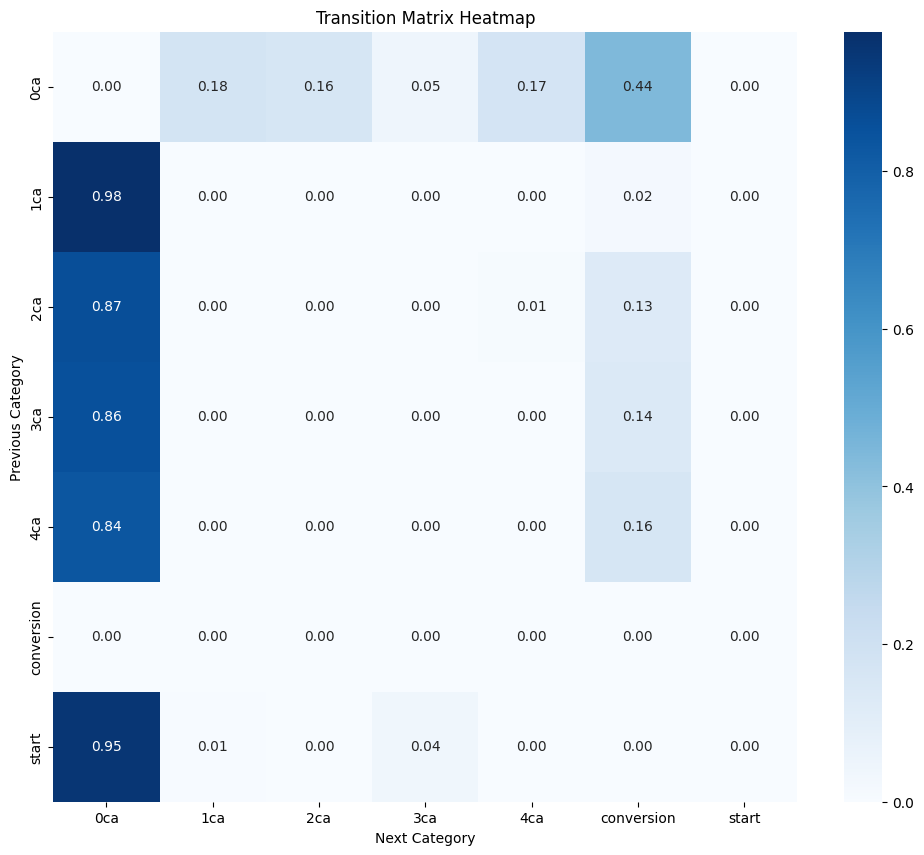

In [45]:
import numpy as np
# Create a transition matrix
categories = sorted(set([step[0] for step in pattern_dict.keys()] + [step[1] for step in pattern_dict.keys()]))
transition_matrix = pd.DataFrame(0, index=categories, columns=categories)
for (start, end), count in pattern_dict.items():
   transition_matrix.loc[start, end] = count
# Normalize the matrix
transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0).fillna(0)
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(transition_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Transition Matrix Heatmap")
plt.xlabel("Next Category")
plt.ylabel("Previous Category")
plt.show()

This guide should help you accomplish each task, from data wrangling and analysis to visualization and pattern detection using PySpark and Pandas, followed by advanced tasks like creating a transition matrix and generating a heatmap.



PART - II

To work through these tasks, we'll use Google Colab for coding, adding detailed comments to guide each step. The tasks involve exploring, analyzing, and forecasting the revenue time series data using various techniques, including time series decomposition, ARIMA modeling, and an overview of deep learning methods. Here's how we'll proceed:



Question 2.1: Explore the Revenue Time Series

Objective:
- Add missing dates to the revenue time series with a default revenue value set to the mean of the entire dataset.
- Decompose the revenue time series using additive mode and analyze the results for seasonality.



Step-by-Step Solution in Google Colab:

In [62]:
pandas_df.head(5)

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,productName_process,Revenue
transaction_date,,,,,,,,,,,
2019-12-09,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,SetOfWoodenMarketCrates,257.640015
2019-12-09,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,ChristmasStarWishListChalkboard,383.399994
2019-12-09,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,StorageTinVintageLeaf,138.360001
2019-12-09,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,TreeTLightHolderWillieWinkie,127.800003
2019-12-09,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,SetOfKnickKnackTinsPoppies,71.639999


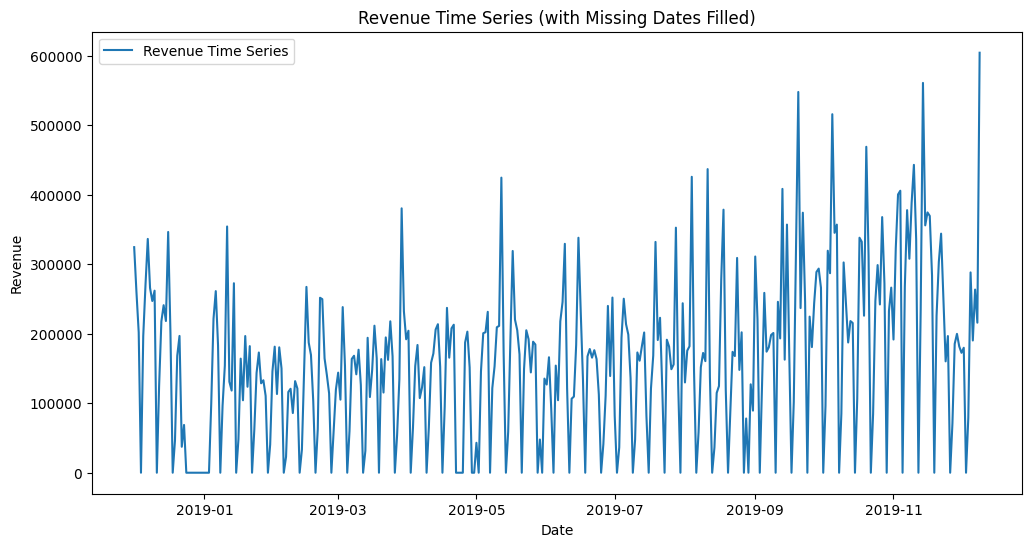

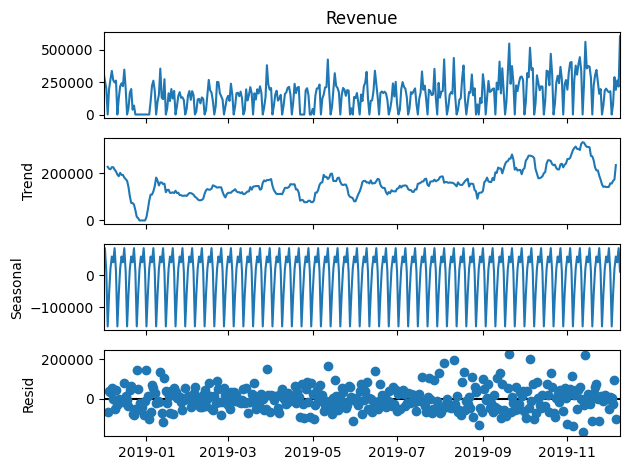

In [64]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
# Load the dataframe (assuming df is available from the previous task)
# If working from scratch, you would load the dataset from a file or other source
# Ensure the 'transaction_date' column is in datetime format
pandas_df['transaction_date'] = pd.to_datetime(pandas_df['transaction_date'])
# Set 'transaction_date' as the index
pandas_df.set_index('transaction_date', inplace=True)
# Resample the data to daily frequency, filling missing days with NaN
daily_revenue = pandas_df['Revenue'].resample('D').sum()
# Calculate the mean revenue to fill in missing values
mean_revenue = daily_revenue.mean()
# Fill missing dates with the mean revenue value
daily_revenue_filled = daily_revenue.fillna(mean_revenue)
# Plot the filled time series to visualize
plt.figure(figsize=(12, 6))
plt.plot(daily_revenue_filled, label='Revenue Time Series')
plt.title('Revenue Time Series (with Missing Dates Filled)')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()
# Decompose the time series using an additive model
decomposition = seasonal_decompose(daily_revenue_filled, model='additive')
# Plot the decomposed components
decomposition.plot()
plt.show()
# Analyze the decomposed components (trend, seasonal, residual)
# The seasonal component helps to identify any repeating patterns, i.e., seasonality.

Analysis:
- The seasonal component from the decomposition will reveal if there's a recurring pattern in the data, indicating seasonality.
- The trend component shows the overall direction of the revenue over time.
- The residual component captures the noise after removing the trend and seasonal effects.

Question 2.2: ARIMA Model for Forecasting

Objective:
- Implement the ARIMA model to forecast future revenue.
- Perform grid search over parameters (p, d, q) within the range [0, 1, 2].
- Identify the model with the lowest Mean Absolute Error (MAE) on the test data.

In [65]:
# Import necessary libraries for ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from itertools import product
# Define the date range for training and testing
train_end = '2019-11-01'
train_data = daily_revenue_filled[:train_end]
test_data = daily_revenue_filled[train_end:]
# Define the range for p, d, q parameters
p = d = q = range(0, 3)
parameters = product(p, d, q)
parameters_list = list(parameters)
# Initialize variables to store the best model
best_aic = np.inf
best_order = None
best_mape = np.inf
best_model = None
# Grid search to find the best ARIMA model
for param in parameters_list:
   try:
       model = ARIMA(train_data, order=param)
       results = model.fit()
       predictions = results.forecast(steps=len(test_data))
       mae = mean_absolute_error(test_data, predictions)
       if mae < best_mape:
           best_aic = results.aic
           best_order = param
           best_mape = mae
           best_model = results
   except:
       continue
# Output the best parameters and corresponding MAE
print(f'Best ARIMA model: Order {best_order} with MAE {best_mape}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/sta

Best ARIMA model: Order (0, 1, 1) with MAE 117621.05865381453


Analysis:
- The code identifies the best ARIMA model by evaluating different combinations of parameters (p, d, q) based on the MAE.
- The best model's order and performance metrics are printed, indicating the most suitable model for forecasting.

Question 2.3: Exploring Deep Learning Time Series Forecasting Methods

Objective:
- Describe necessary data wrangling and modeling steps for deep learning-based time series forecasting methods.
Data Wrangling and Modeling Steps:

Data Preparation:
  - Normalize the Data: Scale the revenue time series data to a range suitable for deep learning models (e.g., between 0 and 1).
  - Train-Test Split: Divide the data into training and testing datasets. Typically, a significant portion is used for training, with a smaller portion reserved for validation/testing.
  - Time Series Windowing: Create input-output pairs by forming sliding windows over the time series. For example, for a window of size `n`, the model predicts the `n+1` value based on the previous `n` values.
Model Selection:
  - Recurrent Neural Networks (RNNs): Consider using RNNs or LSTM (Long Short-Term Memory) networks, which are well-suited for time series data because they can capture temporal dependencies.
  - Convolutional Neural Networks (CNNs): For multivariate time series, CNNs can be applied to capture spatial dependencies in the data.
  - Hybrid Models: Combine RNNs and CNNs to leverage both temporal and spatial features of the data.

3. Model Training:
  - Loss Function: Use Mean Squared Error (MSE) or Mean Absolute Error (MAE) as the loss function to optimize.
  - Optimizer: Common optimizers include Adam or RMSprop, which work well with time series data.
  - Batch Size and Epochs: Experiment with different batch sizes and epochs. Smaller batch sizes may yield better generalization, but it depends on the dataset.

4. Model Evaluation:
  - Validation: Use a separate validation set or cross-validation to tune hyperparameters.
  - Model Metrics: Evaluate model performance using MAE, MSE, or Root Mean Squared Error (RMSE) on the test dataset.

5. Model Deployment:
  - Forecasting: Once the model is trained, it can be used to forecast future values.
  - Update Mechanism: Implement a method to update the model with new data, ensuring the model adapts to any changes in the data over time.